In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as patches
import xarray as xr
import numpy as np
import os
import datetime
import shutil
import glob
import calendar
from matplotlib import gridspec
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter
from mpl_toolkits.axes_grid1 import make_axes_locatable
import tempfile
from PIL import Image

In [19]:
# List of month names
month_names = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

wind_data = 'datasets/data_t.nc'
current_data = 'datasets/cmems_obs-mob_glo_phy-cur_my_0.25deg_P1M-m_1740187181287.nc'
ssh_data = 'datasets/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.125deg_P1D_1740483994742.nc'
sst_data = 'datasets/MUR_Monthly_SST_.nc'
sss_data = 'datasets/cmems_obs-mob_glo_phy-sss_my_multi_P1M_1740653508523.nc'

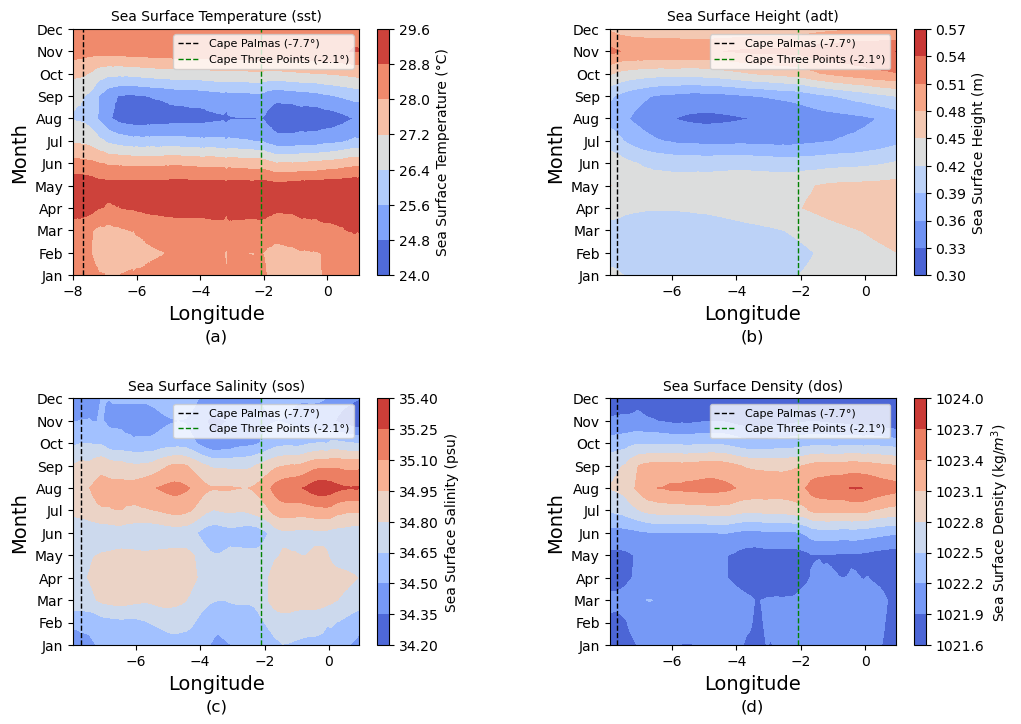

In [20]:
sss_data = xr.open_dataset(sss_data)
ssh_data = xr.open_dataset(ssh_data)
sst_data = xr.open_dataset(sst_data)
dar1 = sss_data.sel(longitude=slice(-8, 1), latitude=slice(4, 6), depth=0)
dar2 = ssh_data.sel(longitude=slice(-8, 1), latitude=slice(4, 6))
dar3 = sst_data.sel(longitude=slice(-8, 1), latitude=slice(4, 6))


sss = dar1.groupby('time.month').mean(['latitude', 'time'])
ssh = dar2.groupby('time.month').mean(['latitude', 'time'])
sst = dar3.groupby('time.month').mean(['latitude', 'time'])

# Cape Palmas (-7.7°) and Cape Three Points (-2.1°)
cape_palmas_lon = -7.7
cape_three_points_lon = -2.1

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(12, 8))
plt.subplots_adjust(right=0.87, wspace=0.5, hspace=0.5)

density_unit = f'(kg/$m^3$)'

# datasets = [(sss, 'sos'), (sss, 'dos'), (ssh, 'adt'), (sst, 'sst')]
datasets = [(sst, 'sst'), (ssh, 'adt'), (sss, 'sos'), (sss, 'dos')]
# titles = ["Sea Surface Salinity (sos)", "Sea Surface Density (dos)", 
#           "Sea Surface Height (adt)", "Sea Surface Temperature (sst)"]
titles = ["Sea Surface Temperature (sst)", "Sea Surface Height (adt)", 
          "Sea Surface Salinity (sos)", "Sea Surface Density (dos)"]
# labs = ["Sea Surface Salinity (psu)", f"Sea Surface Density {density_unit}", 
#           "Sea Surface Height (m)", "Sea Surface Temperature (°C)"]
labs = ["Sea Surface Temperature (°C)", "Sea Surface Height (m)",
        "Sea Surface Salinity (psu)", f"Sea Surface Density {density_unit}", 
           ]

labels = ['(a)', '(b)', '(c)', '(d)']

for i, ((data, var), title, lab, ax) in enumerate(zip(datasets, titles, labs, axes.flat)):
    lon_coords = data[var].longitude.values
    month_coords = np.arange(1, 13)
    
    cf = ax.contourf(lon_coords, month_coords, data[var].values, cmap='coolwarm')
    plt.colorbar(cf, ax=ax, label=f'{lab}')

    # cbar = fig.colorbar(contour, cax=cbar_ax, orientation='vertical')
    # cbar.set_label(f'{var2} {unit}', fontsize=14)  # larger label font

    ax.set_title(title, fontsize=10)
    ax.set_xlabel('Longitude', fontsize=14)
    ax.set_ylabel('Month', fontsize=14)
    ax.set_yticks(range(1, 13))
    ax.set_yticklabels(calendar.month_abbr[1:13])

    ax.axvline(x=cape_palmas_lon, color='black', linestyle='--', linewidth=1, label='Cape Palmas (-7.7°)')
    ax.axvline(x=cape_three_points_lon, color='green', linestyle='--', linewidth=1, label='Cape Three Points (-2.1°)')
    ax.legend(loc='upper right', fontsize=8)

    # Add subplot label below each subplot
    ax.text(0.5, -0.25, labels[i], transform=ax.transAxes,
            fontsize=12, ha='center', va='center')



# plt.suptitle('Signatures of Coastal Upwelling in the Gulf of Guinea', fontsize=12)


plt.savefig('figures/signatures_of_coastal_upwelling.png')


plt.show()